# Project Objective

> This project is developed in a **group of 3 people**. 

The aim of the project is to analyze data provided by Eurostat. This concerns the following dataset:

- **ID**: `crim_gen_reg`
- **Title**: Police-recorded offences by NUTS 3 regions
- **URL**: [Eurostat - Police-recorded offences by NUTS 3 regions](https://ec.europa.eu/eurostat/databrowser/view/crim_gen_reg/default/table?lang=en&category=crim.crim_off)

We are interested in data from Spain, which:

- Represents data on the number of criminal offenses in regions of the country according to the NUTS 3 administrative division.
- Relates to various categories of criminal offenses.
- Is linked to the year 2021.

### Task 1

Let's perform basic statistical inquiries. We will:

- Briefly describe the data under investigation.
- Determine the most important statistical measures that best characterize the data.
- Appropriately represent the data using selected graphs.

### Task 2

Next, we will construct a contingency table of the counts of criminal offenses in different categories and NUTS 3 areas. We will interpret this table, propose hypotheses about its properties, and conduct the relevant test. Of course, interpretation of the test results will follow.

### Task 3

Based on the nature of the data under investigation, let's propose three pairs of hypotheses ( $H_0$ and $H_A$ ) leading to three different statistical tests. Our goal here is:

- Formulate hypotheses considering specific data and information from the overall European framework or other years.
- Explain which tests you have chosen and why.
- Conduct hypothesis tests and interpret their results, both mathematically and practically.

# Task 1


Let's load the dataset.


In [96]:
library(eurostat)

data <- get_eurostat("crim_gen_reg", time_format = "num")


Dataset query already saved in cache_list.json...

Reading cache file /var/folders/mr/k0pz6rcx683c7r2mq_8xr_h80000gn/T//Rtmpohs9KK/eurostat/0a1b33b7ecd36eddb8d894ab74f320fc.rds

Table  crim_gen_reg  read from cache file:  /var/folders/mr/k0pz6rcx683c7r2mq_8xr_h80000gn/T//Rtmpohs9KK/eurostat/0a1b33b7ecd36eddb8d894ab74f320fc.rds



In [97]:
head(data)


freq,unit,iccs,geo,TIME_PERIOD,values
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
A,NR,ICCS0101,AL,2008,88
A,NR,ICCS0101,AL,2009,82
A,NR,ICCS0101,AL,2010,118
A,NR,ICCS0101,AL,2011,124
A,NR,ICCS0101,AL,2012,126
A,NR,ICCS0101,AL,2013,107


Now let's filter the data from the year 2021. It should be NUTS3 (2 letters and 3 digits) and the country code should be "ES" (Spain).


In [98]:
library(dplyr)
library(stringr)

spain_nuts3_2021 <- data %>%
    filter(str_starts(geo, "ES") & nchar(geo) == 5 & TIME_PERIOD == 2021)


## Dataset description

The dataset gives an overview of police-recorded offences in different regions of Spain, categorized by the type of crime, for the year 2021.

| Feature     | Description                                                                                                                                                         |
| ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| freq        | Frequency of the data collection. The value "A" indicates that the data is annual.                                                                                  |
| unit        | Unit of measurement. "NR" stands for "Number of Records," indicating that the values represent counts of records or events.                                         |
| iccs        | International Classification of Crime for Statistical Purposes code.
| geo         | Geographical code. This code represents the specific NUTS 3 region within Spain. A code like "ES111" refers to a specific NUTS 3 region within Spain.               |
| TIME_PERIOD | The year to which the data pertains. In this case, all the records are for the year 2021.                                                                           |
| values      | The actual data values. These numbers represent the count of recorded offences in the corresponding NUTS 3 region for the specified ICCS category in the year 2021. |


In [99]:
head(spain_nuts3_2021)


freq,unit,iccs,geo,TIME_PERIOD,values
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
A,NR,ICCS0101,ES111,2021,7
A,NR,ICCS0101,ES112,2021,1
A,NR,ICCS0101,ES113,2021,4
A,NR,ICCS0101,ES114,2021,6
A,NR,ICCS0101,ES120,2021,1
A,NR,ICCS0101,ES130,2021,4


## Understanding the data


Unique regions:


In [100]:
unique(spain_nuts3_2021$geo)


[1] "ES111" "ES112" "ES113" "ES114" "ES120" "ES130" "ES211" "ES212" "ES213"
[10] "ES220" "ES230" "ES241" "ES242" "ES243" "ES300" "ES411" "ES412" "ES413"
[19] "ES414" "ES415" "ES416" "ES417" "ES418" "ES419" "ES421" "ES422" "ES423"
[28] "ES424" "ES425" "ES431" "ES432" "ES511" "ES512" "ES513" "ES514" "ES521"
[37] "ES522" "ES523" "ES531" "ES532" "ES533" "ES611" "ES612" "ES613" "ES614"
[46] "ES615" "ES616" "ES617" "ES618" "ES620" "ES630" "ES640" "ES703" "ES704"
[55] "ES705" "ES706" "ES707" "ES708" "ES709" "ESZZZ"

Let's see the unique crime types.


In [101]:
unique(spain_nuts3_2021$iccs)


[1] "ICCS0101"   "ICCS02011"  "ICCS0401"   "ICCS0501"   "ICCS05012" 
[6] "ICCS0502"   "ICCS050211"

### Crime type descriptions


Ideally, we would like to understand, what each crime type means. We are going to hard-code a dataframe with the crime types and their descriptions. We would also add a **subjective severity** for the later analysis. 5 is the highest severity and 1 is the lowest.


In [102]:
crime_descriptions <- data.frame(
    iccs = c(
        "ICCS0101", "ICCS02011", "ICCS0401", "ICCS0501", "ICCS05012",
        "ICCS0502", "ICCS050211"
    ),
    description = c(
        "Homicide", "Assault", "Burglary", "Theft", "Motor vehicle theft",
        "Robbery", "Shoplifting"
    ),
    severity = c(5, 4, 3, 2, 3, 4, 1)
)

crime_descriptions$severity <- as.integer(crime_descriptions$severity)

spain_nuts3_2021 <- merge(spain_nuts3_2021, crime_descriptions, by = "iccs")


In [103]:
head(spain_nuts3_2021)


,iccs,freq,unit,geo,TIME_PERIOD,values,description,severity
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
1,ICCS0101,A,NR,ES111,2021,7,Homicide,5
2,ICCS0101,A,NR,ES112,2021,1,Homicide,5
3,ICCS0101,A,NR,ES113,2021,4,Homicide,5
4,ICCS0101,A,NR,ES114,2021,6,Homicide,5
5,ICCS0101,A,NR,ES120,2021,1,Homicide,5
6,ICCS0101,A,NR,ES130,2021,4,Homicide,5


### Region names


We are going to do the same with region names: fetch them from `eurostat` and merge them with the dataset.


In [104]:
nuts_names <- get_eurostat_dic("geo")
head(nuts_names)


code_name,full_name
<chr>,<chr>
EUR,Europe
EU,"European Union (EU6-1958, EU9-1973, EU10-1981, EU12-1986, EU15-1995, EU25-2004, EU27-2007, EU28-2013, EU27-2020)"
EU_V,European Union (aggregate changing according to the context)
EU_V_NO,European Union (aggregate changing according to the context) and Norway
EU27_2020_EFTA,European Union - 27 countries (from 2020) and European Free Trade Association (EFTA) countries
EU27_2020_IS_K,European Union - 27 countries (from 2020) and Iceland under the Kyoto Protocol


In [105]:
spain_nuts3_2021 <- merge(spain_nuts3_2021, nuts_names, by.x = "geo", by.y = "code_name")

head(spain_nuts3_2021)


,geo,iccs,freq,unit,TIME_PERIOD,values,description,severity,full_name
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>
1,ES111,ICCS0101,A,NR,2021,7.00,Homicide,5,A Coru<U+00F1>a
2,ES111,ICCS0401,A,P_HTHAB,2021,41.27,Burglary,3,A Coru<U+00F1>a
3,ES111,ICCS02011,A,NR,2021,1878.00,Assault,4,A Coru<U+00F1>a
4,ES111,ICCS0502,A,P_HTHAB,2021,145.31,Robbery,4,A Coru<U+00F1>a
5,ES111,ICCS0502,A,NR,2021,1630.00,Robbery,4,A Coru<U+00F1>a
6,ES111,ICCS0501,A,NR,2021,1872.00,Theft,2,A Coru<U+00F1>a


### Removing redundant columns


In [106]:
unique(spain_nuts3_2021$freq)


[1] "A"

`freq` column is redundant, so we can remove it. It just indicates that the measurments are done **per annum**.


In [107]:
spain_nuts3_2021 <- spain_nuts3_2021 %>% select(-freq)


Let's check `TIME_PERIOD` column.


In [108]:
unique(spain_nuts3_2021$TIME_PERIOD)


[1] 2021

We have no `NA` in the `TIME_PERIOD` column, so we can remove it.


In [109]:
spain_nuts3_2021 <- spain_nuts3_2021 %>% select(-TIME_PERIOD)


### Categorical features


We are going to make `geo`, `iccs` and `unit` columns categorical.


In [110]:
spain_nuts3_2021$geo <- as.factor(spain_nuts3_2021$geo)
spain_nuts3_2021$iccs <- as.factor(spain_nuts3_2021$iccs)
spain_nuts3_2021$unit <- as.factor(spain_nuts3_2021$unit)


### Splitting the dataset


In [111]:
unique(spain_nuts3_2021$unit)


[1] NR      P_HTHAB
Levels: NR P_HTHAB

Unit column shows whether the measurment is per 100 000 inhabitants or absolute number of crimes.

We are going to **split** the dataset into to separate datasets: one for **absolute numbers** and one for **per 100 000 inhabitants**. Then we will be able to correctly apply statistical methods to the data.


In [112]:
spain_nr <- spain_nuts3_2021 %>%
    filter(unit == "NR")

spain_nr <- spain_nr %>% select(-unit)

head(spain_nr)


,geo,iccs,values,description,severity,full_name
,<fct>,<fct>,<dbl>,<chr>,<int>,<chr>
1,ES111,ICCS0101,7,Homicide,5,A Coru<U+00F1>a
2,ES111,ICCS02011,1878,Assault,4,A Coru<U+00F1>a
3,ES111,ICCS0502,1630,Robbery,4,A Coru<U+00F1>a
4,ES111,ICCS0501,1872,Theft,2,A Coru<U+00F1>a
5,ES111,ICCS050211,64,Shoplifting,1,A Coru<U+00F1>a
6,ES111,ICCS0401,463,Burglary,3,A Coru<U+00F1>a


In [113]:
spain_hth <- spain_nuts3_2021 %>%
    filter(unit == "P_HTHAB")

spain_hth <- spain_hth %>% select(-unit)

head(spain_hth)


,geo,iccs,values,description,severity,full_name
,<fct>,<fct>,<dbl>,<chr>,<int>,<chr>
1,ES111,ICCS0401,41.27,Burglary,3,A Coru<U+00F1>a
2,ES111,ICCS0502,145.31,Robbery,4,A Coru<U+00F1>a
3,ES111,ICCS02011,167.42,Assault,4,A Coru<U+00F1>a
4,ES111,ICCS050211,5.71,Shoplifting,1,A Coru<U+00F1>a
5,ES111,ICCS0101,0.62,Homicide,5,A Coru<U+00F1>a
6,ES111,ICCS05012,113.22,Motor vehicle theft,3,A Coru<U+00F1>a


### Statistical measures


In [114]:
summary(spain_nr %>% select(-description, -full_name))


      geo              iccs        values         severity    
 ES111  :  7   ICCS0101  :59   Min.   :    0   Min.   :1.000  
 ES112  :  7   ICCS02011 :60   1st Qu.:   51   1st Qu.:2.000  
 ES113  :  7   ICCS0401  :60   Median :  308   Median :3.000  
 ES114  :  7   ICCS0501  :60   Mean   : 1135   Mean   :3.138  
 ES120  :  7   ICCS05012 :60   3rd Qu.: 1106   3rd Qu.:4.000  
 ES130  :  7   ICCS0502  :60   Max.   :34868   Max.   :5.000  
 (Other):377   ICCS050211:60                                  

In [115]:
summary(spain_hth %>% select(-description, -full_name))


      geo              iccs        values          severity    
 ES111  :  7   ICCS0101  :59   Min.   :  0.00   Min.   :1.000  
 ES112  :  7   ICCS02011 :60   1st Qu.: 18.84   1st Qu.:2.000  
 ES113  :  7   ICCS0401  :60   Median : 98.78   Median :3.000  
 ES114  :  7   ICCS0501  :60   Mean   :114.12   Mean   :3.138  
 ES120  :  7   ICCS05012 :60   3rd Qu.:174.46   3rd Qu.:4.000  
 ES130  :  7   ICCS0502  :60   Max.   :667.78   Max.   :5.000  
 (Other):377   ICCS050211:60                                   

Variance for absolute numbers:


In [116]:
var(spain_nr$values)


[1] 7821384

Variance for crimes per 100,000 inhabitants:


In [117]:
var(spain_hth$values)


[1] 12271.4

In [118]:
library(ggplot2)
library(dplyr)
library(repr)


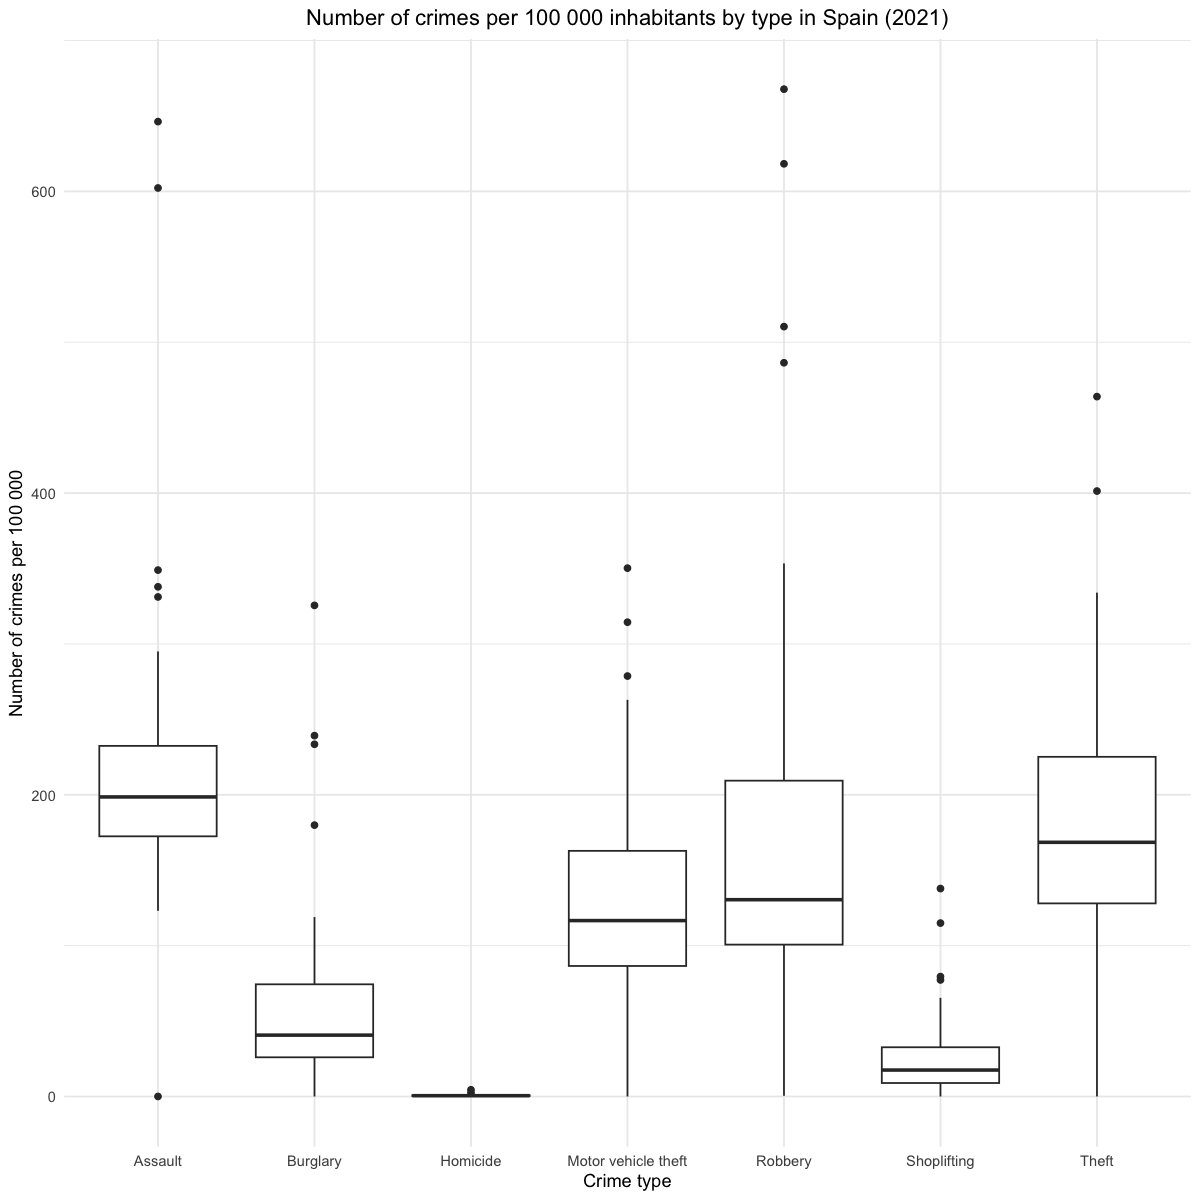

In [119]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(spain_hth, aes(x = description, y = values)) +
    geom_boxplot() +
    labs(title = "Number of crimes per 100 000 inhabitants by type in Spain (2021)", x = "Crime type", y = "Number of crimes per 100 000") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))


### Graphs


#### Crimes in different regions


Let's plot sum of all crimes in different regions (absolute and per 100 000 inhabitants).


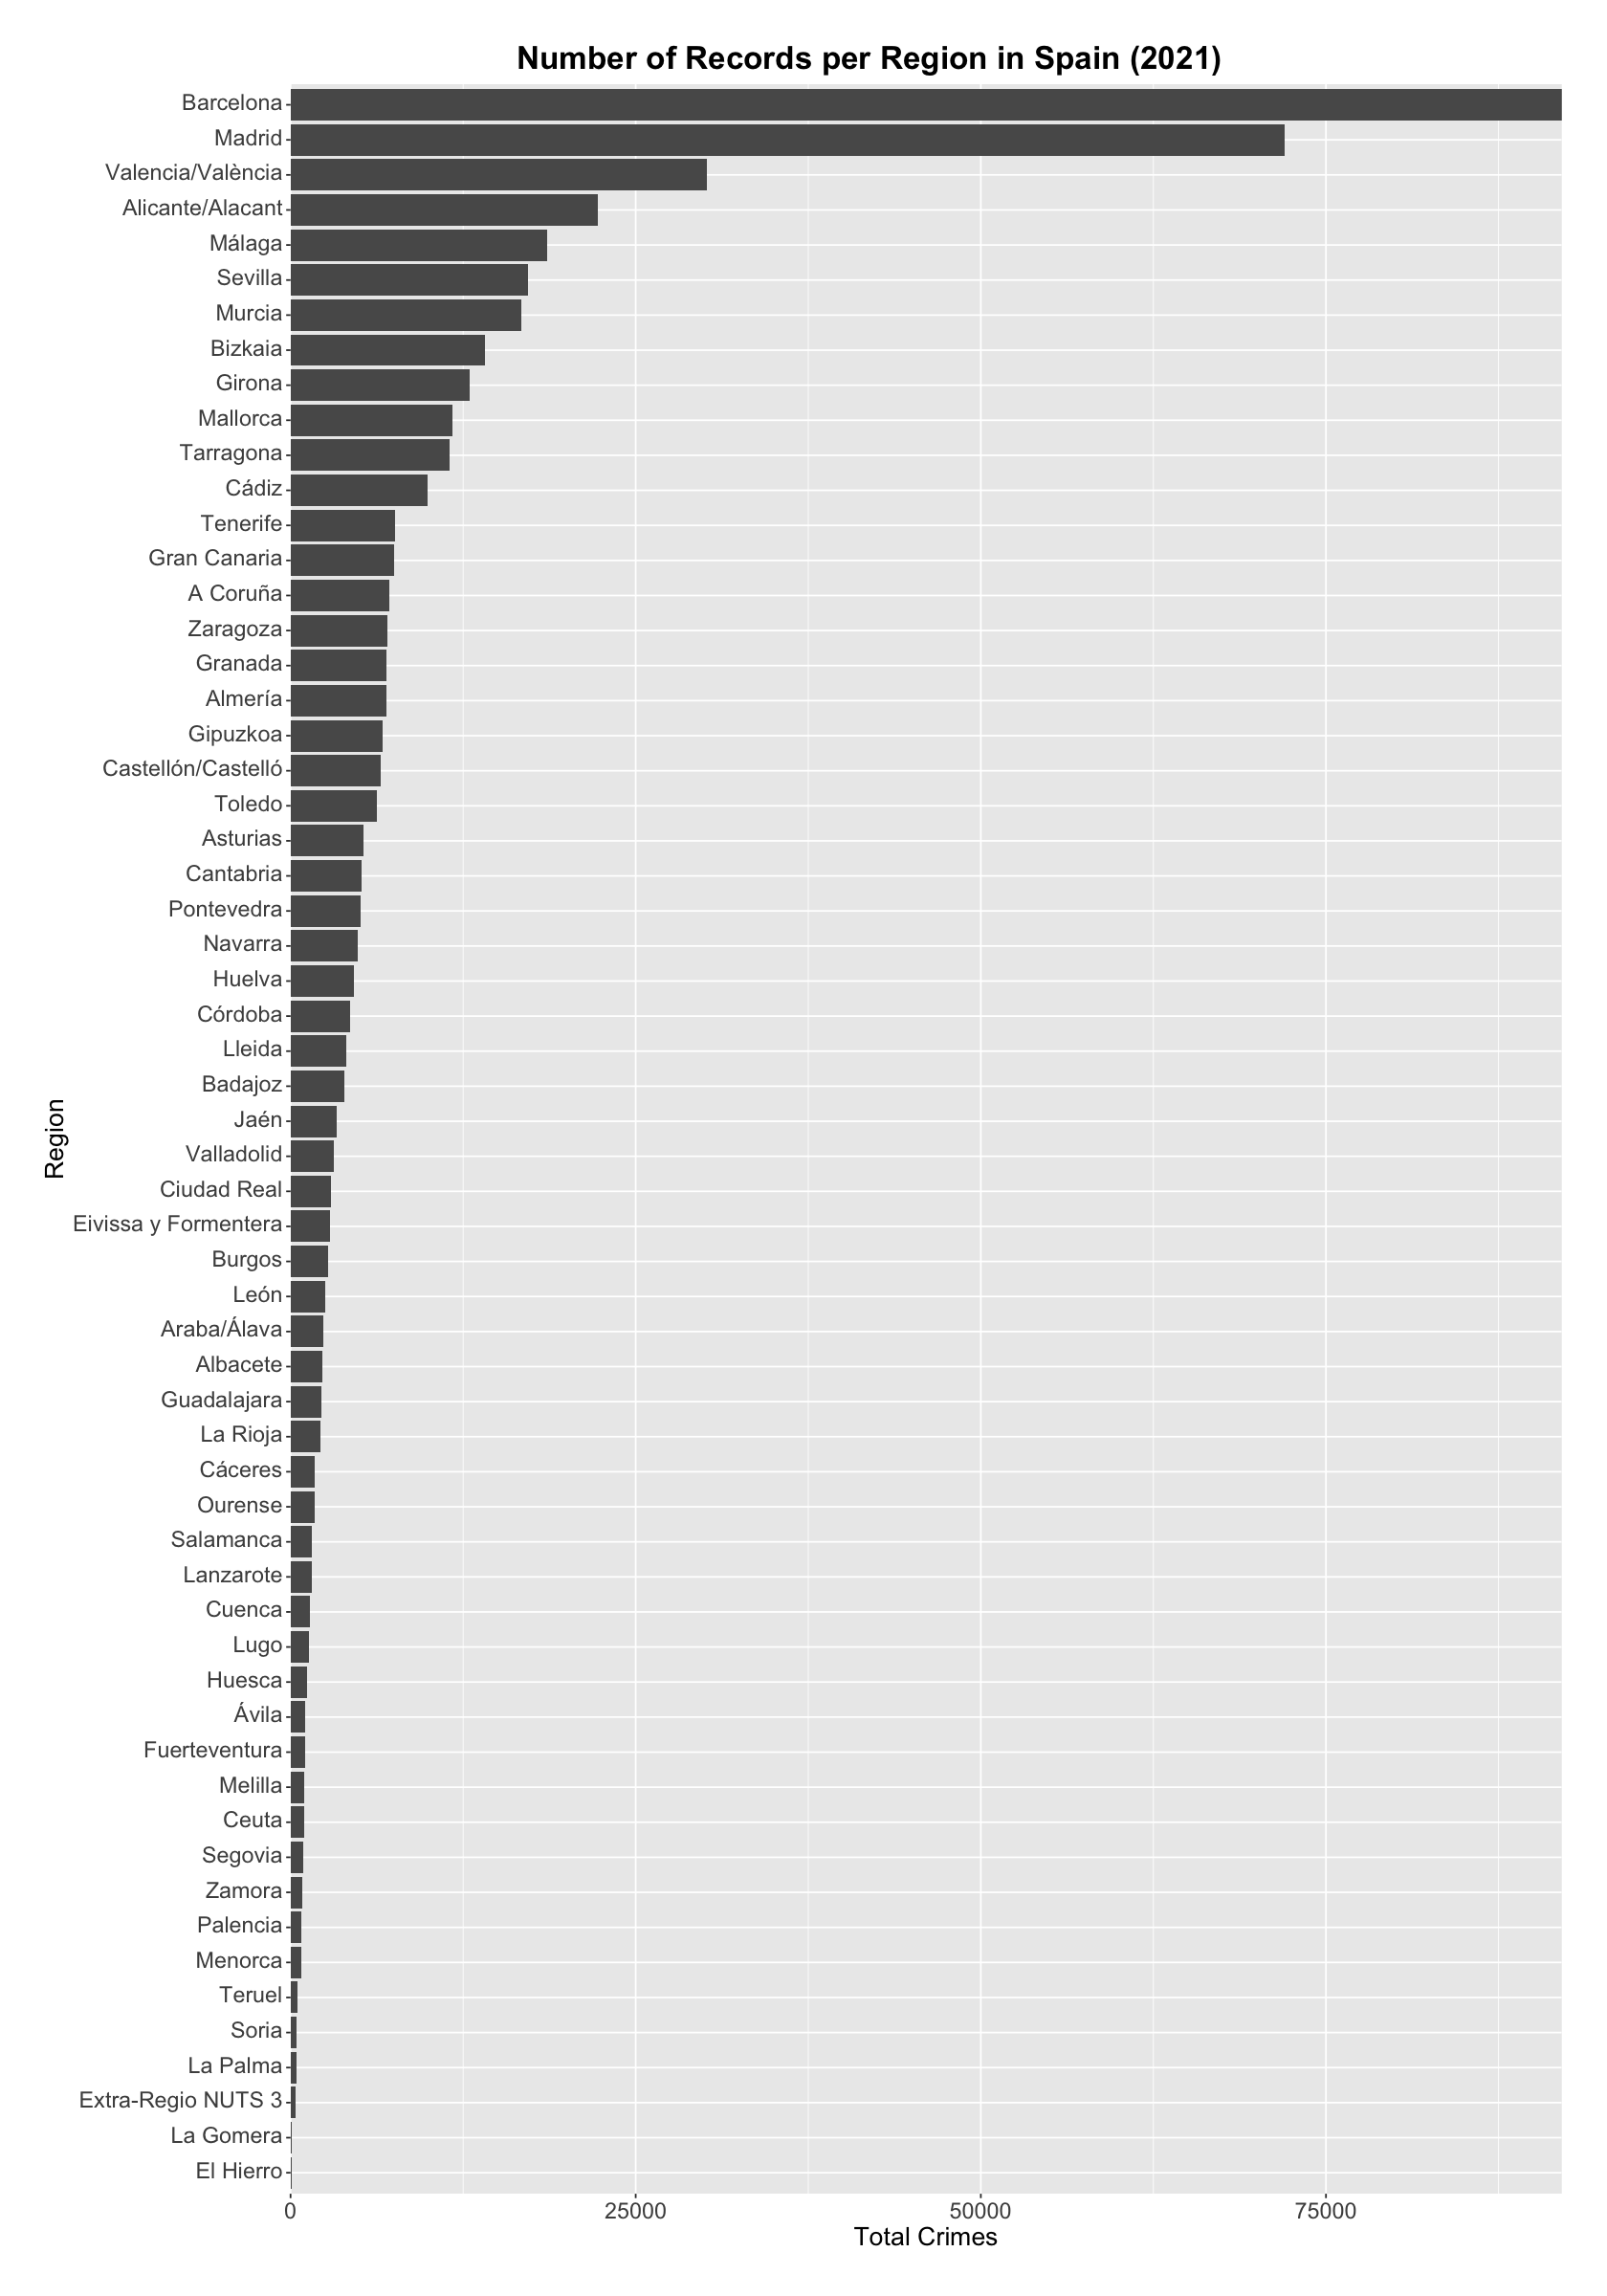

In [120]:
options(repr.plot.width = 14, repr.plot.height = 20)

crimes_per_region_full_name <- spain_nr %>%
    group_by(full_name) %>%
    summarize(total_crimes = sum(values))

ggplot(crimes_per_region_full_name, aes(y = reorder(full_name, total_crimes), x = total_crimes)) +
    geom_bar(stat = "identity") +
    scale_x_continuous(expand = c(0, 0)) +
    theme(
        axis.text.x = element_text(angle = 0, hjust = 0.5, size = 14),
        axis.text.y = element_text(size = 14, vjust = 0.3),
        axis.title = element_text(size = 16),
        plot.title = element_text(size = 20, hjust = 0.4, face = "bold"),
        plot.margin = margin(1, 1, 1, 1, "cm")
    ) +
    labs(x = "Total Crimes", y = "Region", title = "Number of Records per Region in Spain (2021)")


The number of absolute crimes is not very informative, because the population of the regions is different. Let's plot the number of crimes per 100 000 inhabitants. We are going to add colors to the graph bars to indicate the type of crime.


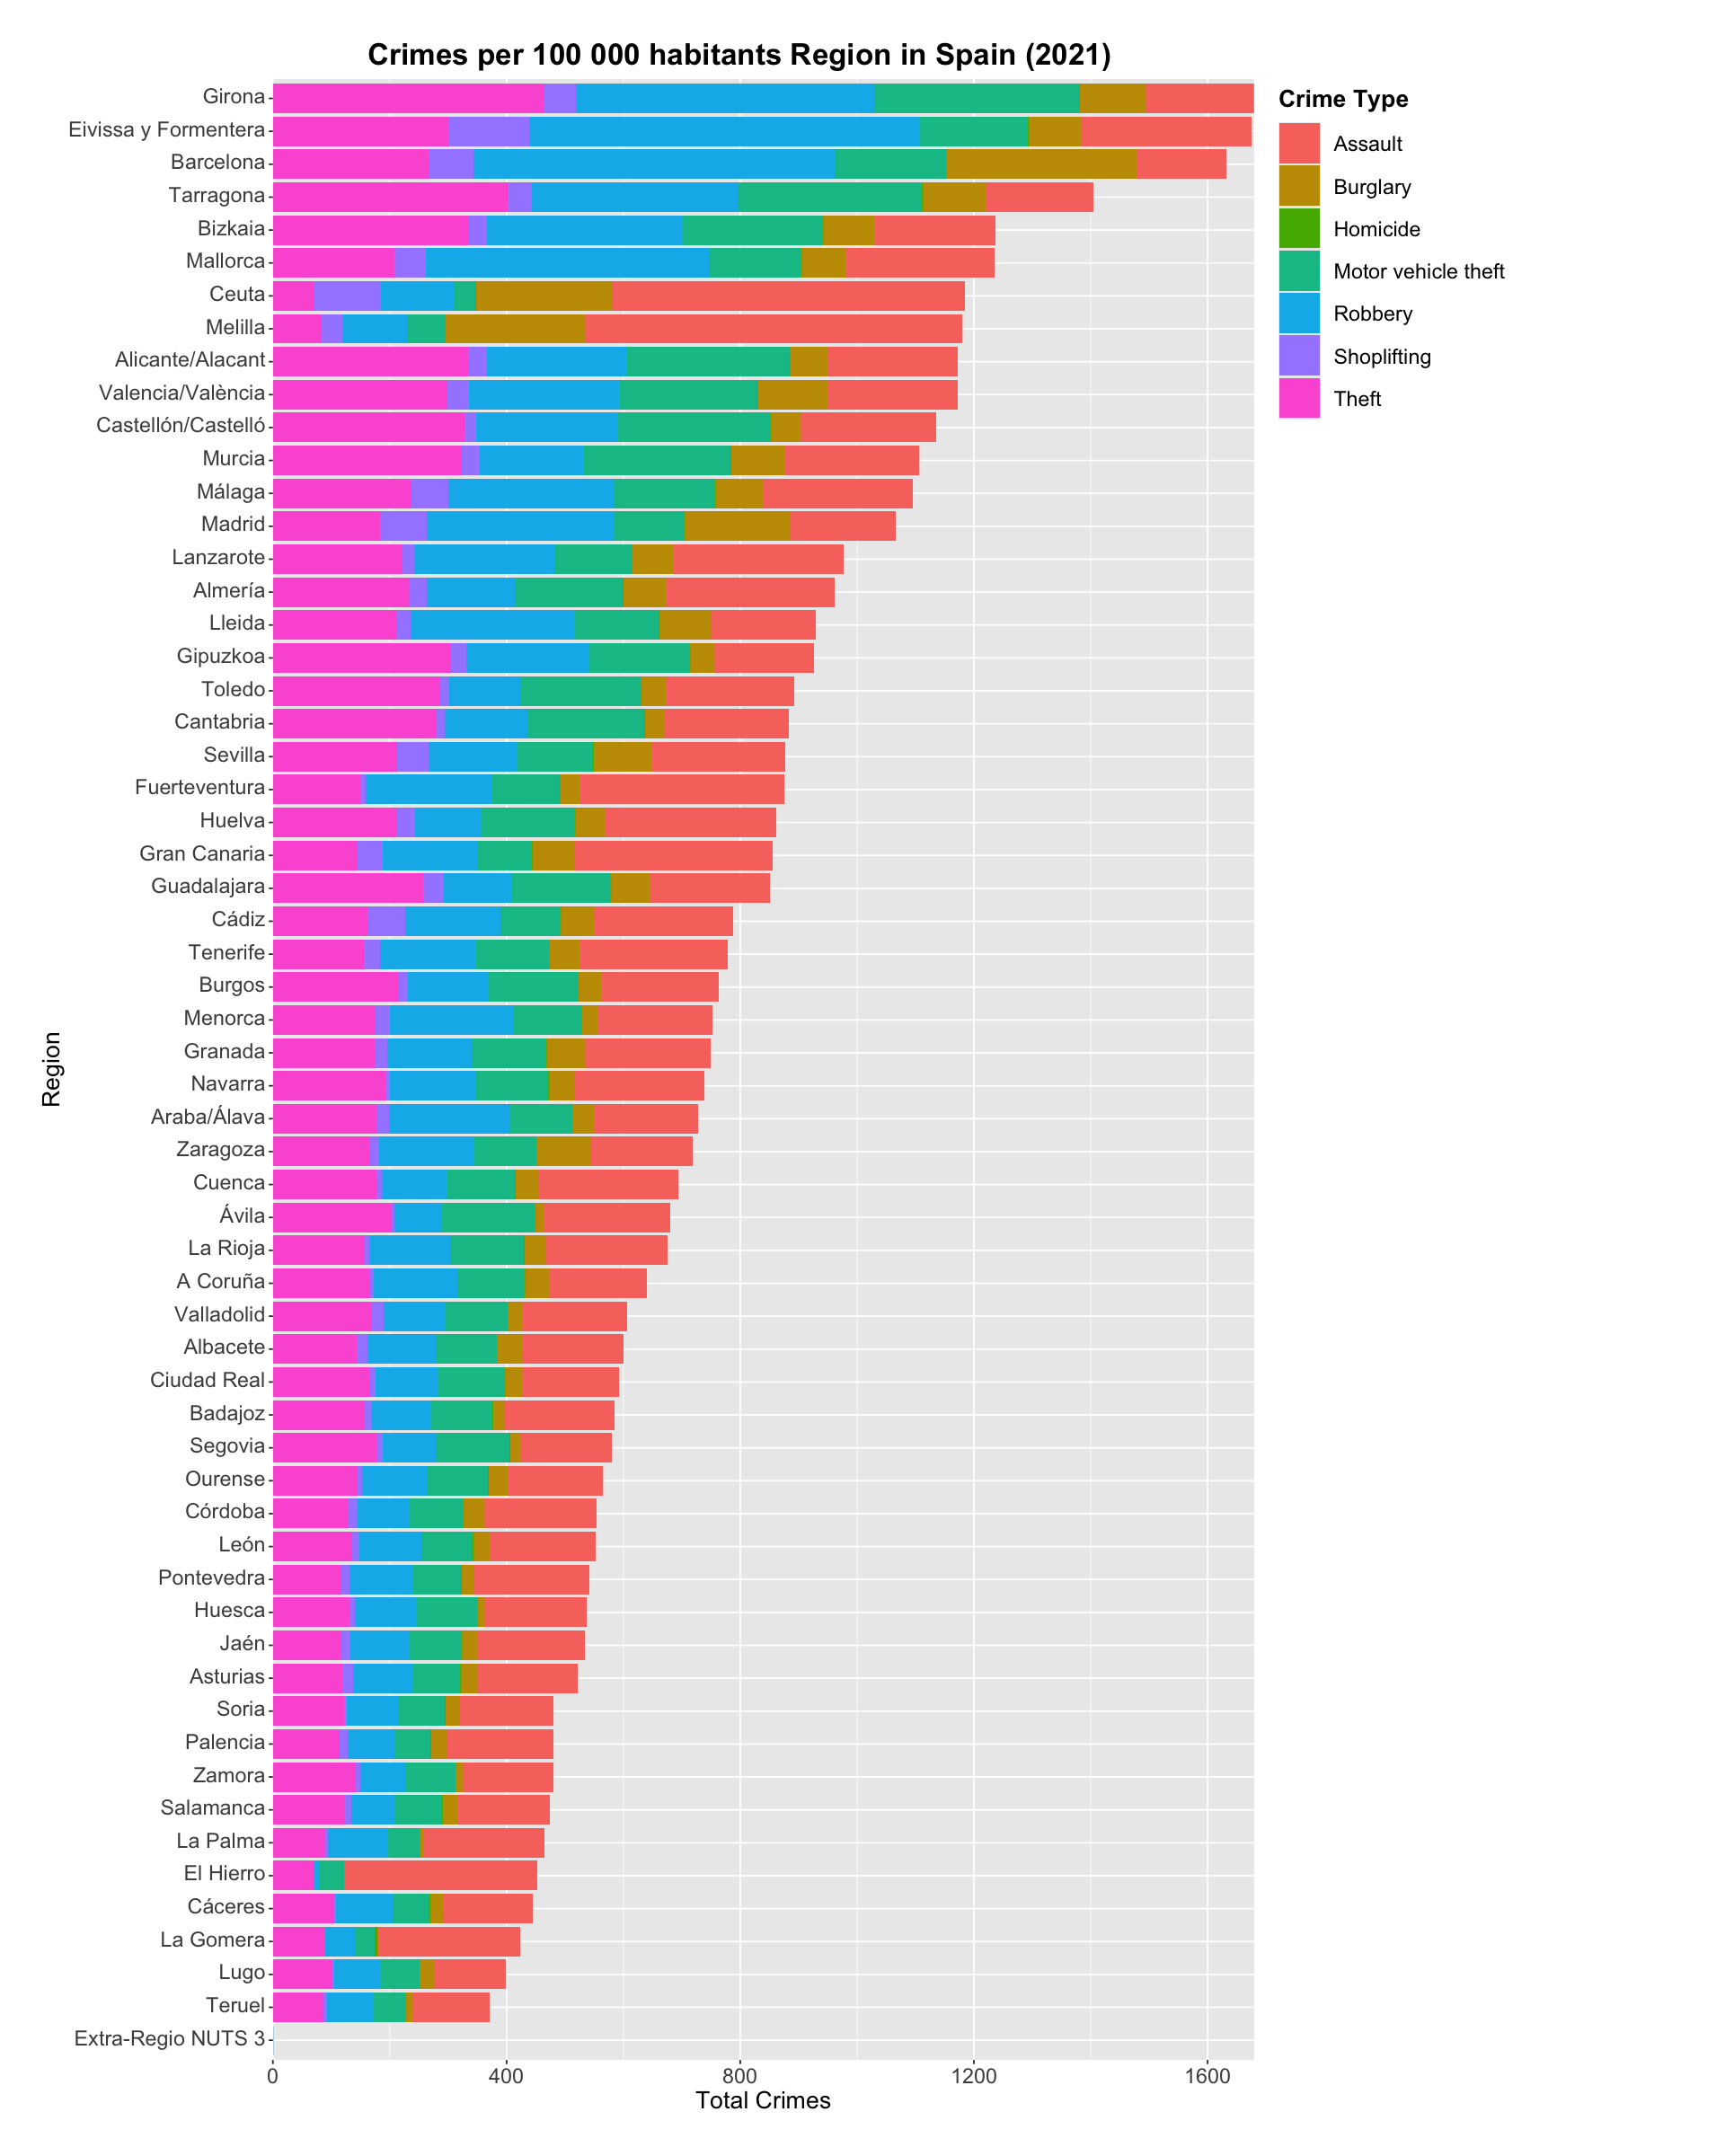

In [121]:
library(ggplot2)
library(dplyr)
library(repr)
options(repr.plot.width = 16, repr.plot.height = 20)

crimes_per_region_type <- spain_hth %>%
    group_by(full_name, description) %>%
    summarize(total_crimes = sum(values), .groups = "drop")

ggplot(crimes_per_region_type, aes(
    y = reorder(full_name, total_crimes),
    x = total_crimes, fill = description
)) +
    geom_bar(stat = "identity", position = "stack") +
    scale_x_continuous(expand = c(0, 0)) +
    theme(
        axis.text.x = element_text(angle = 0, hjust = 0.5, size = 14),
        axis.text.y = element_text(size = 14, vjust = 0.3),
        axis.title = element_text(size = 16),
        plot.title = element_text(size = 20, hjust = 0.4, face = "bold"),
        plot.margin = margin(1, 5, 1, 1, "cm"),
        legend.text = element_text(size = 14),
        legend.key.size = unit(1, "cm"),
        legend.title = element_text(size = 16, face = "bold"),
        legend.key.spacing = unit(0.3, "cm"),
        legend.justification = "top"
    ) +
    labs(
        x = "Total Crimes", y = "Region",
        title = "Crimes per 100 000 habitants Region in Spain (2021)",
        fill = "Crime Type"
    )


This is a very informative graph. We can clearly see a couple of things, for example:

- _Girona, Eivissa y Formentera_ and _Barcelona_ have the highest number of crimes per 100 000 inhabitants.
- The number of `Homicide` is extremely low in all regions, compared to other crime types.
- Although crime rate in _Ceuta_ and _Melilla_ is high, the number of `Thefts` is relatively low.


#### Homicides per 100 000 habitants


Let's find out the most dangerous regions of Spain: the ones with the highest number of homicides per 100 000 habitants.


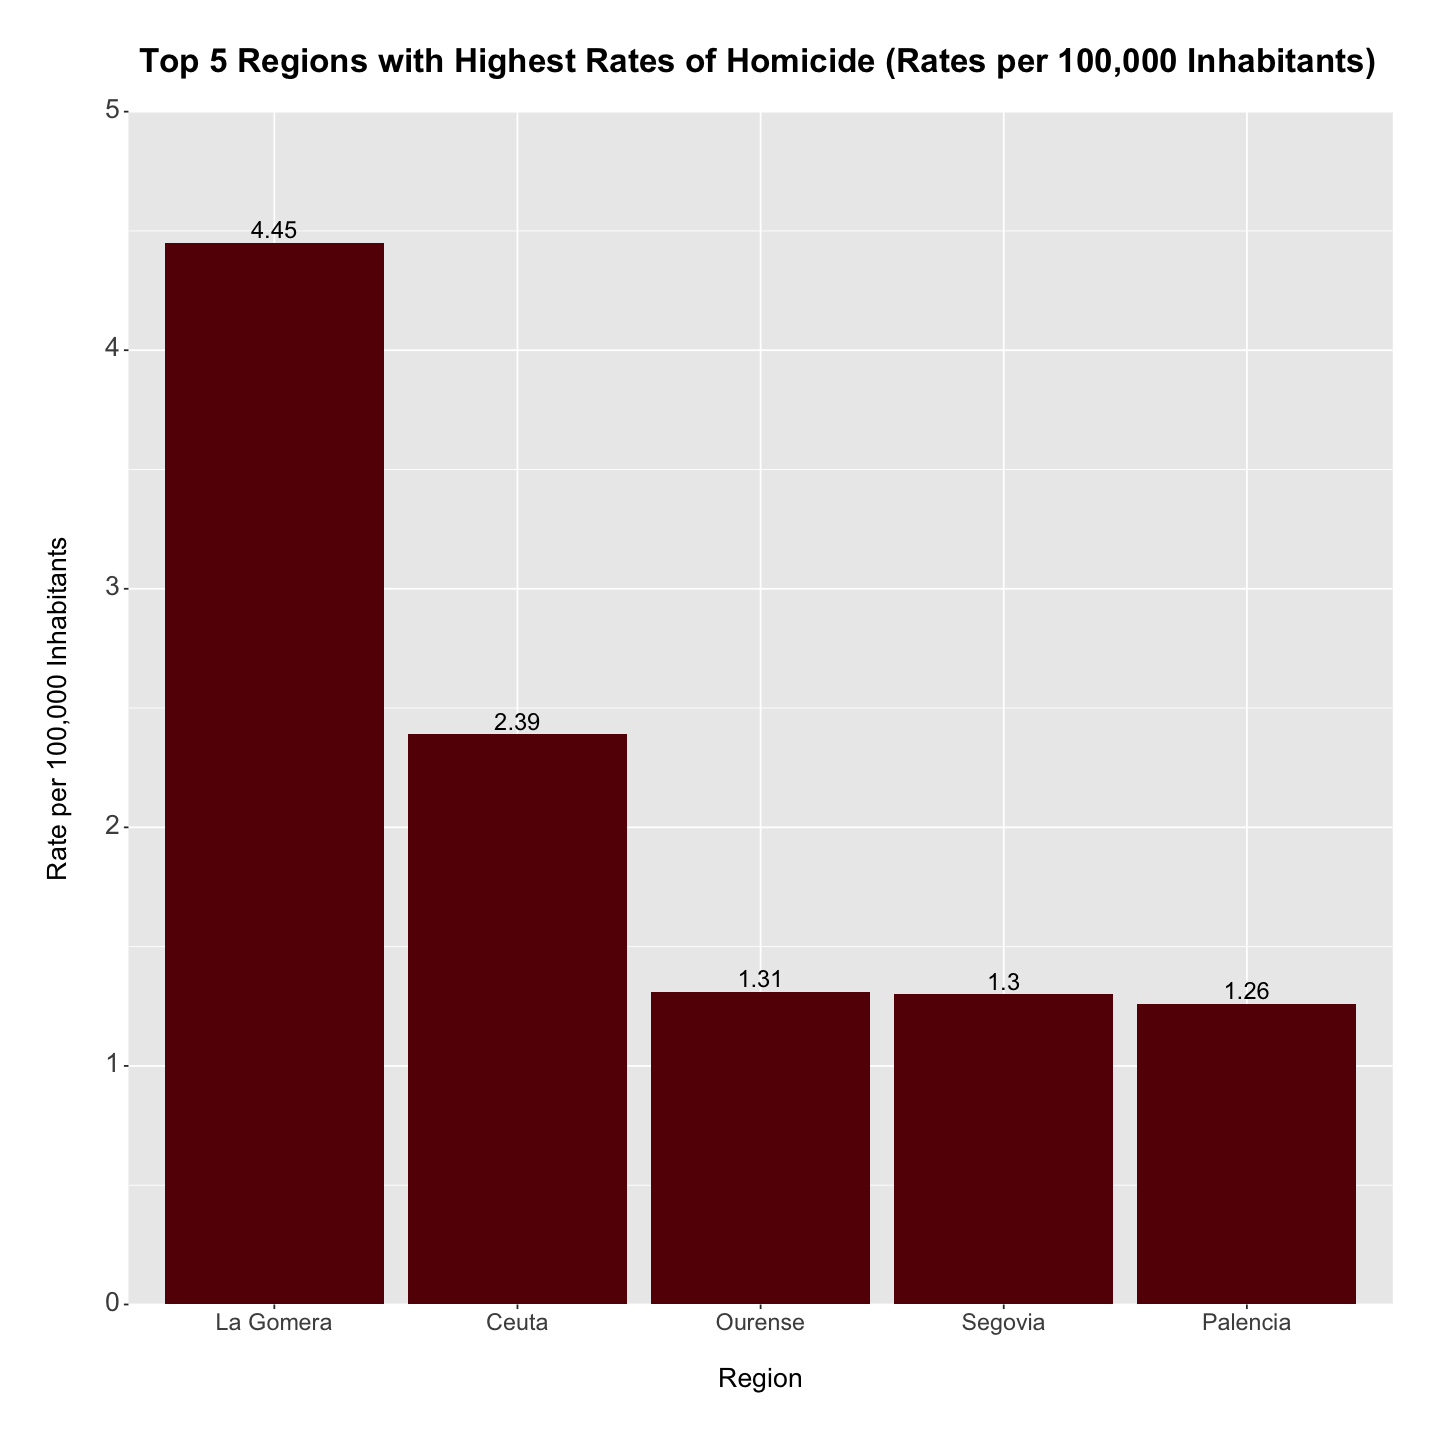

In [122]:
options(repr.plot.width = 12, repr.plot.height = 12)

spain_hth %>%
    filter(description == "Homicide") %>%
    arrange(desc(values)) %>%
    head(5) %>%
    ggplot(aes(x = reorder(full_name, -values), y = values)) +
    geom_col(fill = "#640404") +
    geom_text(aes(label = values), vjust = -0.3, size = 5) +
    scale_y_continuous(expand = c(0, 0), limits = c(0, 5)) +
    theme(
        axis.text.x = element_text(angle = 0, hjust = 0.5, size = 14),
        axis.text.y = element_text(size = 16, vjust = 0.3),
        axis.title = element_text(size = 16),
        axis.title.x = element_text(margin = margin(20, 0, 0, 0)),
        axis.title.y = element_text(margin = margin(0, 20, 0, 0)),
        plot.title = element_text(
            size = 20, hjust = 0.4, face = "bold",
            margin = margin(0, 0, 20, 0)
        ),
        plot.margin = margin(1, 1, 1, 1, "cm"),
    ) +
    labs(
        title = "Top 5 Regions with Highest Rates of Homicide (Rates per 100,000 Inhabitants)",
        x = "Region",
        y = "Rate per 100,000 Inhabitants"
    )


The highest number of homicides per 100 000 habitants is in _Ceuta_ and _La Gomera_, which are both **overseas territories of Spain**.


#### Crime type count comparson between Madrid, Barcelona, Ceuta and Girona


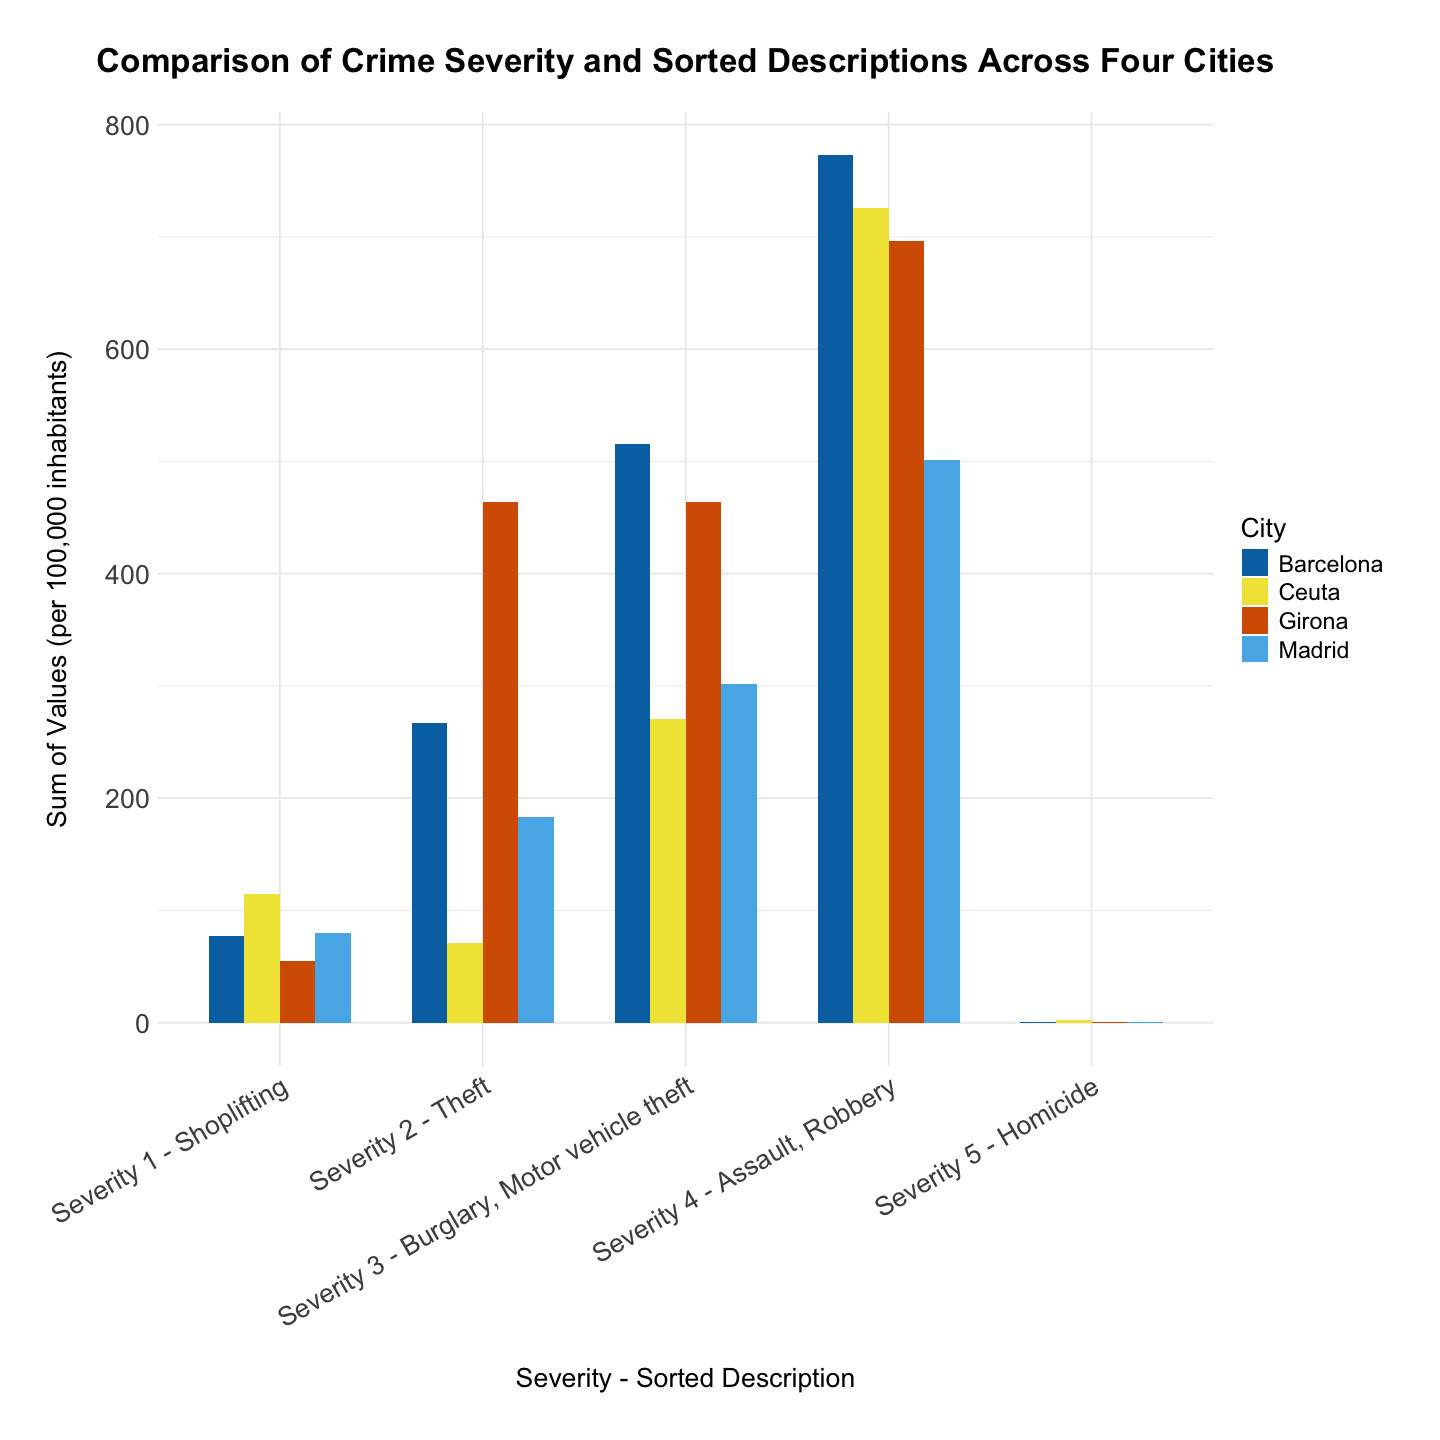

In [123]:
library(ggplot2)
library(dplyr)
library(stringr)

big_cities_data <- spain_hth %>%
    filter(full_name %in% c("Madrid", "Barcelona", "Ceuta", "Girona")) %>%
    group_by(full_name, severity) %>%
    summarise(
        sum_values = sum(values),
        descriptions = toString(sort(unique(description))),
        .groups = "drop"
    )

big_cities_data <- big_cities_data %>%
    mutate(severity_description = paste("Severity", severity, "-", descriptions))

theme <- theme(
    axis.text.x = element_text(angle = 30, hjust = 1, size = 16),
    axis.text.y = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.title.x = element_text(margin = margin(20, 0, 0, 0)),
    axis.title.y = element_text(margin = margin(0, 20, 0, 0)),
    plot.title = element_text(size = 20, hjust = 0.5, face = "bold", margin = margin(0, 0, 20, 0)),
    plot.margin = margin(1, 1, 1, 1, "cm"),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
)

ggplot(big_cities_data, aes(x = severity_description, y = sum_values, fill = full_name)) +
    geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
    theme_minimal() +
    scale_fill_manual(values = c("Madrid" = "#56B4E9", "Barcelona" = "#0072B2", "Ceuta" = "#F0E442", "Girona" = "#D55E00")) +
    theme +
    labs(
        title = "Comparison of Crime Severity and Sorted Descriptions Across Four Cities",
        x = "Severity - Sorted Description",
        y = "Sum of Values (per 100,000 inhabitants)",
        fill = "City"
    )


Homicide is a very rare crime, we are going to plot a separate graph for it.


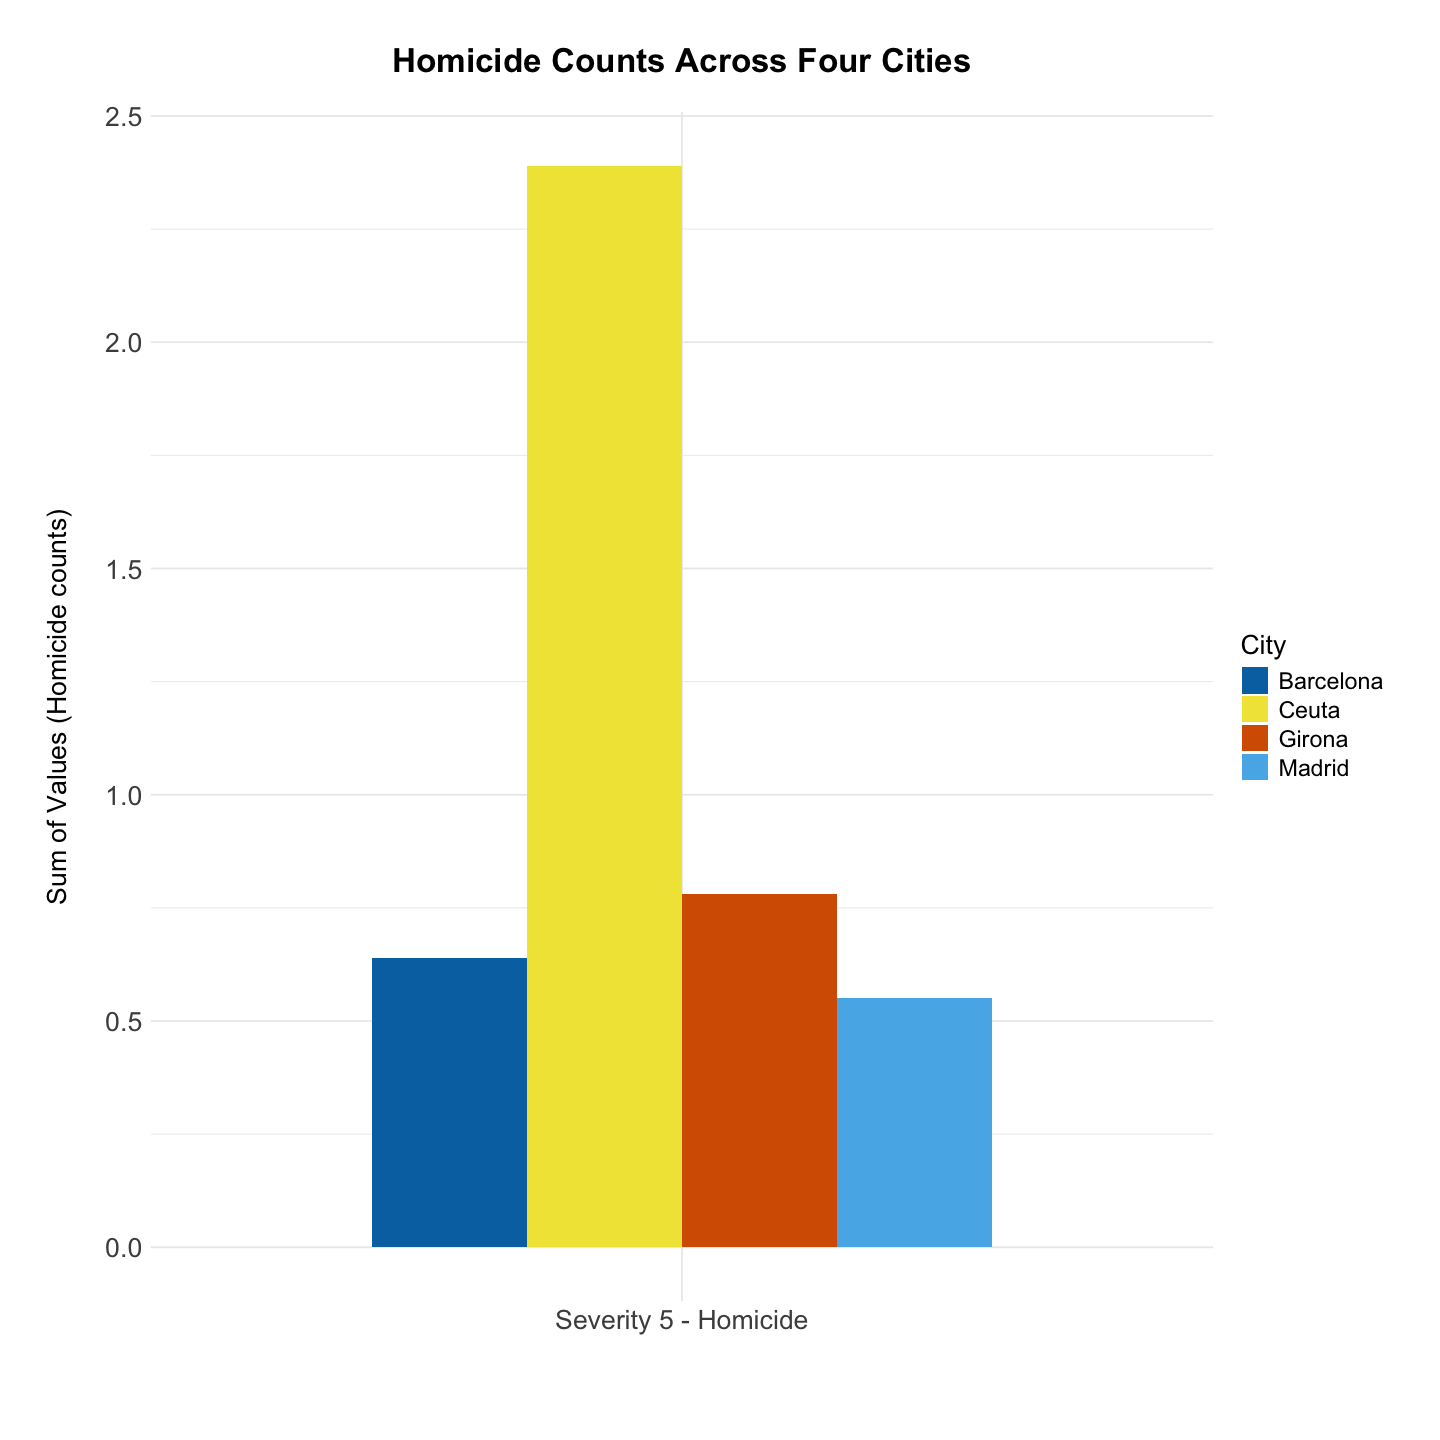

In [124]:
homicide_data <- big_cities_data %>%
    filter(str_detect(descriptions, "Homicide"))

ggplot(homicide_data, aes(x = severity_description, y = sum_values, fill = full_name)) +
    geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
    scale_y_continuous(labels = scales::comma) + # Using a continuous scale; change to scale_y_log10() if needed
    scale_fill_manual(values = c("Madrid" = "#56B4E9", "Barcelona" = "#0072B2", "Ceuta" = "#F0E442", "Girona" = "#D55E00")) +
    theme_minimal() +
    theme +
    theme(axis.text.x = element_text(angle = 0, hjust = 0.5, size = 16)) +
    labs(
        title = "Homicide Counts Across Four Cities",
        x = "",
        y = "Sum of Values (Homicide counts)",
        fill = "City"
    )


- **Barcelona** and **Girona** both have an elevated risk of `Motor vehicle thefts` and `Burglaries`. This is likely due to the high vehicle density in these areas (for instance motorcycles and scooters).
- **Madrid** is the safest region among these four, with the **lowest number of severe crimes**.
- **Ceuta** has the **highest number of homicides** per 100 000 habitants, but the number of middle-severity crimes is relatively low.


## Task 2


### Contingency Table


Let's create a contingency table for `Region` vs `Crime description` per 100 000 habitants. We are also going to add marginal sums to the table.

The Homicide column will not be used, as it's an outlier column. The outlier rows are also going to be removed.

We are not going to create a table for absolute numbers, because the population of the regions is going to heavily influence absolute crime counts, making it hard to create meaningful tests.


In [125]:
ct_hth <- xtabs(formula = values ~ full_name + description, data = spain_hth)
ct_hth <- ct_hth[, -which(colnames(ct_hth) == "Homicide")]

row_sums <- rowSums(ct_hth)

lower_bound <- quantile(row_sums, 0.05)
upper_bound <- quantile(row_sums, 0.95)

rows_to_keep <- row_sums >= lower_bound & row_sums <= upper_bound
ct_hth <- ct_hth[rows_to_keep, ]

addmargins(ct_hth)


,Assault,Burglary,Motor vehicle theft,Robbery,Shoplifting,Theft,Sum
Ávila,215.92,14.48,160.52,81.21,4.41,203.33,679.87
A Coruña,167.42,41.27,113.22,145.31,5.71,166.88,639.81
Albacete,171.78,45.26,102.35,118.55,18.00,143.75,599.69
Alicante/Alacant,223.57,63.95,278.71,240.03,31.87,334.00,1172.13
Almería,286.88,74.08,183.39,152.60,29.27,233.89,960.11
Araba/Álava,178.01,36.39,107.35,206.52,18.80,179.53,726.60
Asturias,172.28,29.12,82.14,100.90,18.86,119.07,522.37
Badajoz,188.47,19.71,106.78,100.06,11.95,157.56,584.53
Bizkaia,206.25,88.52,240.99,333.37,33.78,333.37,1236.28
Burgos,200.40,40.08,152.98,139.15,15.52,215.07,763.20


In the table, the count of crimes vary across different regions. This indicates that possibly the number of crimes is dependent on the region. We are going to test this hypothesis using **chi-squared independence test**.

Using this table, we are going to propose hypothesis:
- $H_0$: The distribution of _crimes of each crime type per hth inhabitants_ is **independent** of the _region._
- $H_A$: The distribution of _crimes of each crime type per hth inhabitants_ is **not independent** on the _region._


In [126]:
chisq.test(ct_hth)



	Pearson's Chi-squared test

data:  ct_hth
X-squared = 5177.6, df = 265, p-value < 2.2e-16


In [127]:
min_value <- min(chisq.test(ct_hth)$expected)
cat("Min value:", min_value)


Min value: 12.74839

There are no expected values less than 5, **the test is valid.**

We **reject** the null hypothesis $H_0$ as the $p$-value is less than the standard significance level of 0.05. This means that the variables are **not independent**, so there is a relationship between the region and the crime rate.


## Task 3

### 1. Crime rate distribution tests


Let's explore historical data for total `Homicide` crimes in Spain.


In [128]:
spain_nuts3_all <- data %>%
    filter(str_starts(geo, "ES") & nchar(geo) == 5)


In [129]:
head(spain_nuts3_all)


freq,unit,iccs,geo,TIME_PERIOD,values
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
A,NR,ICCS0101,ES111,2008,10
A,NR,ICCS0101,ES111,2009,11
A,NR,ICCS0101,ES111,2010,8
A,NR,ICCS0101,ES111,2011,8
A,NR,ICCS0101,ES111,2012,6
A,NR,ICCS0101,ES111,2013,7


Let's remove `freq` column and filter only `Per 100 000 inhabitants` data.


In [130]:
spain_nuts3_all_hth <- spain_nuts3_all %>%
    filter(unit == "P_HTHAB")

spain_nuts3_all_hth <- spain_nuts3_all_hth %>% select(-unit, -freq)


In [131]:
head(spain_nuts3_all_hth)


iccs,geo,TIME_PERIOD,values
<chr>,<chr>,<dbl>,<dbl>
ICCS0101,ES111,2008,0.89
ICCS0101,ES111,2009,0.97
ICCS0101,ES111,2010,0.70
ICCS0101,ES111,2011,0.70
ICCS0101,ES111,2012,0.53
ICCS0101,ES111,2013,0.61


Add region names and crime type descriptions.


In [132]:
spain_nuts3_all_hth <- merge(spain_nuts3_all_hth, crime_descriptions, by = "iccs")
spain_nuts3_all_hth <- merge(spain_nuts3_all_hth, nuts_names, by.x = "geo", by.y = "code_name")


Now, we are going to filter out **Madrid** and **Tarragona** to compare them and conduct tests.

In [133]:
historical <- spain_nuts3_all_hth


In [134]:
historical_homicides <- historical %>%
    filter(description == "Homicide")


In [135]:
historical_homicides %>%
    filter(full_name == "Madrid")

historical_homicides %>%
    filter(full_name == "Tarragona")


geo,iccs,TIME_PERIOD,values,description,severity,full_name
<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>
ES300,ICCS0101,2008,1.03,Homicide,5,Madrid
ES300,ICCS0101,2009,0.81,Homicide,5,Madrid
ES300,ICCS0101,2010,0.80,Homicide,5,Madrid
ES300,ICCS0101,2011,0.72,Homicide,5,Madrid
ES300,ICCS0101,2012,0.75,Homicide,5,Madrid
ES300,ICCS0101,2013,0.58,Homicide,5,Madrid
ES300,ICCS0101,2015,0.47,Homicide,5,Madrid
ES300,ICCS0101,2016,0.51,Homicide,5,Madrid
ES300,ICCS0101,2017,0.60,Homicide,5,Madrid


geo,iccs,TIME_PERIOD,values,description,severity,full_name
<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>
ES514,ICCS0101,2008,1.28,Homicide,5,Tarragona
ES514,ICCS0101,2009,1.64,Homicide,5,Tarragona
ES514,ICCS0101,2010,1.50,Homicide,5,Tarragona
ES514,ICCS0101,2011,1.74,Homicide,5,Tarragona
ES514,ICCS0101,2012,1.49,Homicide,5,Tarragona
ES514,ICCS0101,2013,0.37,Homicide,5,Tarragona
ES514,ICCS0101,2014,0.88,Homicide,5,Tarragona
ES514,ICCS0101,2017,0.76,Homicide,5,Tarragona
ES514,ICCS0101,2018,1.01,Homicide,5,Tarragona


Before conducting Welch's t-test, we need to check the assumptions:
- **Normality**: The data should be normally distributed. We are going to use the Shapiro-Wilk test.
- **Homogeneity of variances**: The variances should be checked for equality. Based on that, we are going to adjust the 'var.equal' parameter in the t-test.

### 1. Normaility test

- $H_0$: The data is normally distributed.
- $H_A$: The data is not normally distributed.

In [136]:
madrid_homicides <- historical_homicides %>%
    filter(full_name == "Madrid")

tarragona_homicides <- historical_homicides %>%
    filter(full_name == "Tarragona")

shapiro.test(madrid_homicides$values)
shapiro.test(tarragona_homicides$values)



	Shapiro-Wilk normality test

data:  madrid_homicides$values
W = 0.89501, p-value = 0.09549



	Shapiro-Wilk normality test

data:  tarragona_homicides$values
W = 0.9479, p-value = 0.5285


$p$-value is more than 0.05. Shapiro-Wilk test indicates that the data is **normally distributed**.


### 2. Variance test

- $H_0$: The variances of Madrid and Tarragona Homicide rates are equal.
- $H_A$: The variances of Madrid and Tarragona Homicide rates are not equal.

In [137]:
var.test(madrid_homicides$values, tarragona_homicides$values)



	F test to compare two variances

data:  madrid_homicides$values and tarragona_homicides$values
F = 0.10256, num df = 13, denom df = 13, p-value = 0.0002217
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.03292541 0.31948994
sample estimates:
ratio of variances 
         0.1025638 


F-test $p$-value is less than 0.05, so we **reject** the null hypothesis, prooving that **the variances are not equal.**


### 3. Welsh's t-test

- $H_0$: The mean of Tarragona historical homicides is **less or equal** to the mean of Madrid.
- $H_A$: The mean of Tarragona historical homicides is **greater** than the mean of Madrid.

In [138]:
t.test(
    tarragona_homicides$values, madrid_homicides$values,
    alternative = "greater", var.equal = FALSE
)



	Welch Two Sample t-test

data:  tarragona_homicides$values and madrid_homicides$values
t = 2.5621, df = 15.639, p-value = 0.01058
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.1125251       Inf
sample estimates:
mean of x mean of y 
1.0007143 0.6464286 


The $p$-value is less than 0.05, so we **reject** the null hypothesis. This means that the historical mean of Tarragona homicides is **greater** than the mean of Madrid homicides.

### 4. Proove that number of burglaries in Madrid is falling over time

- $H_0$: The downward trend in burglaries from year 2008 to 2021 is **not statistically significant**.
- $H_A$: The downward trend in burglaries from year 2008 to 2021 is **statistically significant**.

In [139]:
historical_burglaries_madrid <- historical %>%
    filter(description == "Burglary" & full_name == "Madrid")

historical_burglaries_madrid <- historical_burglaries_madrid[order(historical_burglaries_madrid$TIME_PERIOD), ]

historical_burglaries_madrid

,geo,iccs,TIME_PERIOD,values,description,severity,full_name
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>
4,ES300,ICCS0401,2008,363.74,Burglary,3,Madrid
5,ES300,ICCS0401,2009,350.48,Burglary,3,Madrid
6,ES300,ICCS0401,2010,326.85,Burglary,3,Madrid
10,ES300,ICCS0401,2011,338.10,Burglary,3,Madrid
7,ES300,ICCS0401,2012,385.88,Burglary,3,Madrid
8,ES300,ICCS0401,2013,341.73,Burglary,3,Madrid
9,ES300,ICCS0401,2014,289.51,Burglary,3,Madrid
2,ES300,ICCS0401,2015,273.35,Burglary,3,Madrid
3,ES300,ICCS0401,2016,264.50,Burglary,3,Madrid


`geom_smooth()` using formula = 'y ~ x'


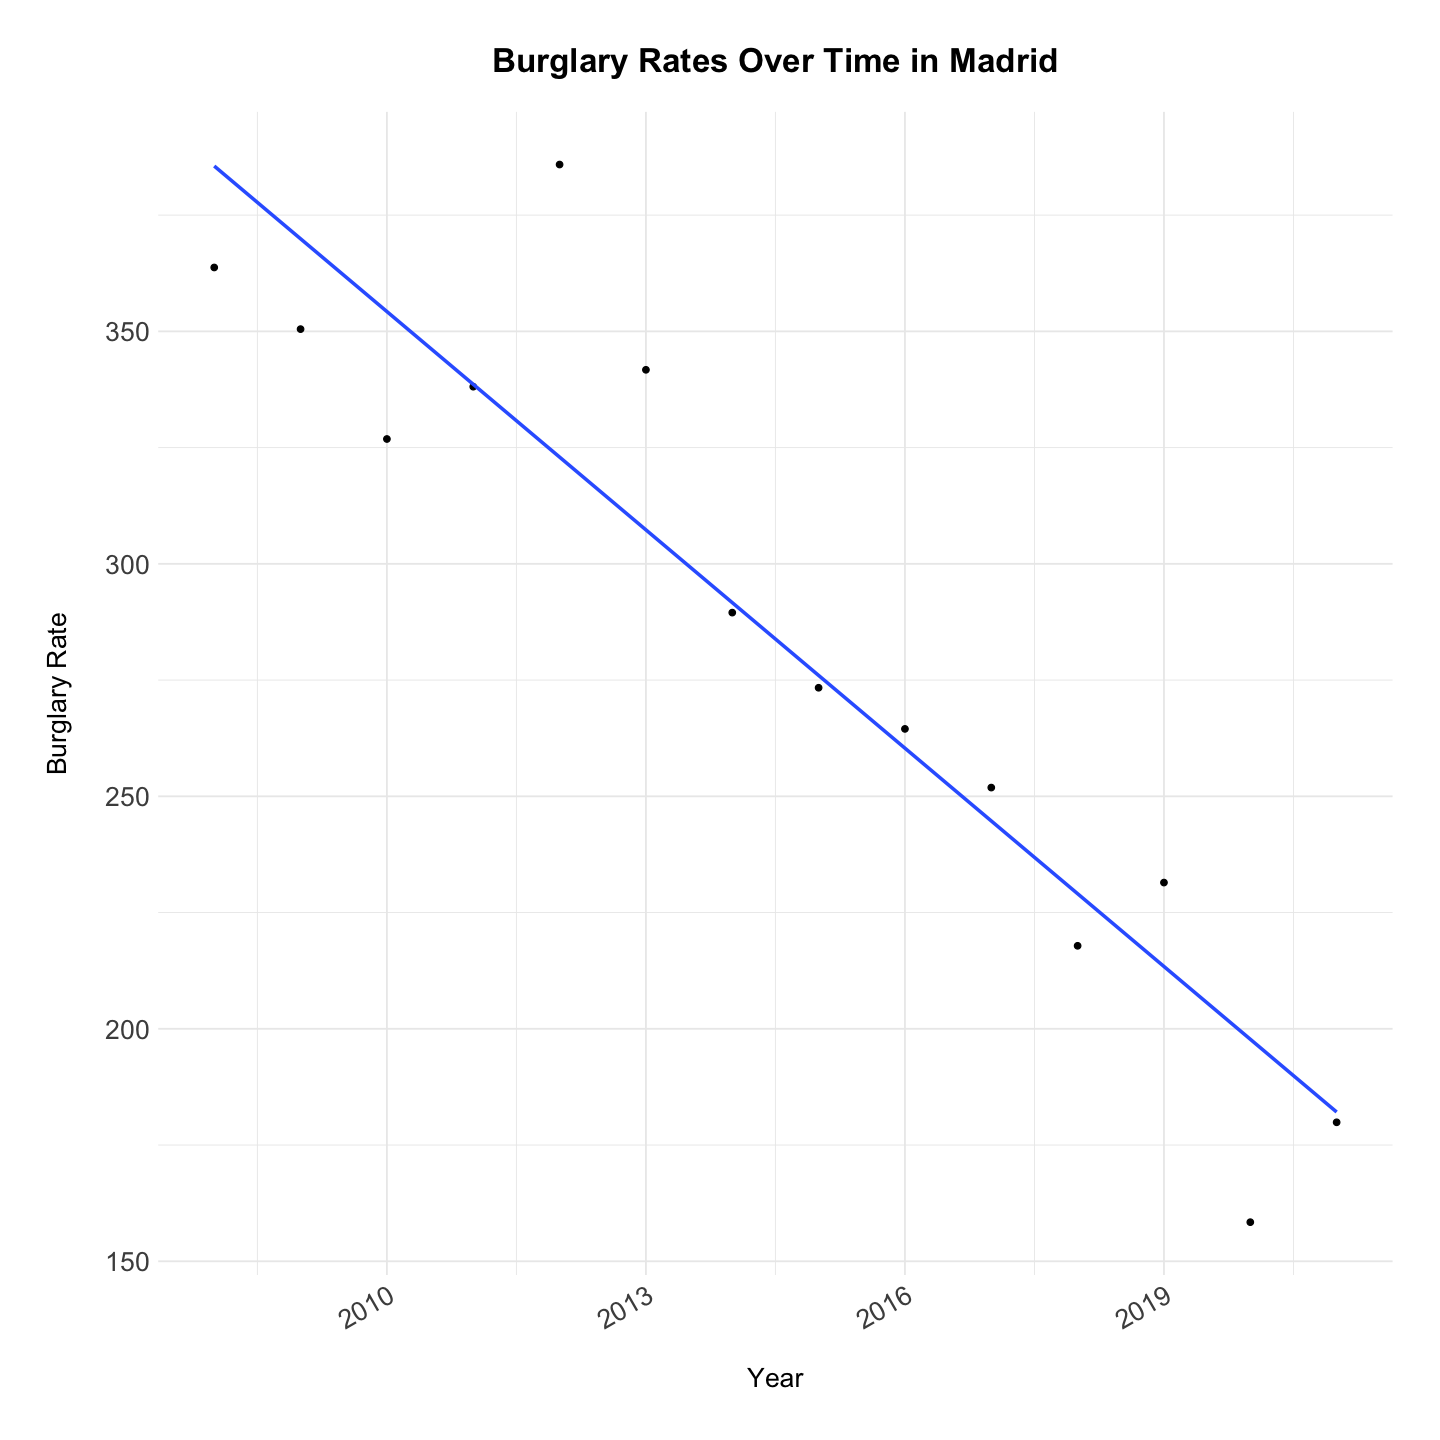

In [140]:
ggplot(historical_burglaries_madrid, aes(x = TIME_PERIOD, y = values)) +
  geom_point() +
  theme_minimal() +
  theme +
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "Year", y = "Burglary Rate", title = "Burglary Rates Over Time in Madrid")


In [141]:
lm_model <- lm(values ~ TIME_PERIOD, data = historical_burglaries_madrid)

In [142]:
summary(lm_model)


Call:
lm(formula = values ~ TIME_PERIOD, data = historical_burglaries_madrid)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.342 -17.372  -2.178   6.419  62.924 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31811.950   3623.723   8.779 1.43e-06 ***
TIME_PERIOD   -15.651      1.799  -8.700 1.58e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27.13 on 12 degrees of freedom
Multiple R-squared:  0.8632,	Adjusted R-squared:  0.8518 
F-statistic:  75.7 on 1 and 12 DF,  p-value: 1.576e-06


### Coefficients
- **Burglary rates decrease by about 15,651 cases per 100 000 habitants each year**, indicating a significant yearly reduction.

### Statistical Significance
- **Highly significant p-values** for the intercept and time suggest a real effect of the year on burglary rates.

### Residuals
- **Residual analysis** shows that the model's predictions are close to actual values, with some outliers indicated by the maximum residual 62,924.

### Residual Standard Error
- **Average deviation between observed and predicted values** is 27,13, reflecting the model's fit quality is good, compared to the scale of the data. This may also be seen on the graph.

### $R^2$ and Adjusted $R^2$
- **85,18% of the variability in burglary rates** is explained by the year, indicating a strong model fit.

### F-statistic
- **The model as a whole is significant**, with an F-statistic indicating that year significantly predicts burglary rates.

### Summary
Overall, these findings provide evidence that states with **higher percentile rankings tend to have higher SAT scores**, supporting the presence of a positive linear relationship between Rank and SAT scores.